In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split

tf.__version__

'2.1.0'

In [13]:
games_tourney = pd.read_csv('./games_tourney.csv')

# The `keras` Functional API

## Input layers

In [3]:
# create an input layer of shape 1
input_tensor = Input(shape=(1,))

## Dense layers

In [4]:
# create a dense layer with 1 neuron
output_layer = Dense(1)

# connect dense layer to input_tensor
output_tensor = output_layer(input_tensor)

## Output layers

In [5]:
# input layer
input_tensor = Input(shape=(1,))

# create a dense layer and connect the dense layer to the input_tensor in one step
output_tensor = Dense(1)(input_tensor)

# Build and compile a model

## Build a model

In [8]:
# define model
input_tensor = Input(shape=(1,))
output_tensor = Dense(1)(input_tensor)

# build model
model = Model(inputs=input_tensor,
              outputs=output_tensor)

## Compile a model

In [9]:
model.compile(optimizer='adam',
              loss='mae')

## Visualize a model

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


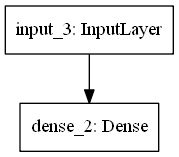

In [12]:
plot_model(model)

# Fit and evaluate a model

In [15]:
print(games_tourney.shape)
games_tourney.head()

(4234, 9)


,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won
0,1985,288,73,0,-3,-9,41,50,0
1,1985,5929,73,0,4,6,61,55,1
2,1985,9884,73,0,5,-4,59,63,0
3,1985,73,288,0,3,9,50,41,1
4,1985,3920,410,0,1,-9,54,63,0


In [22]:
X = games_tourney['seed_diff'].to_numpy('float32')
y = games_tourney['score_diff'].to_numpy('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=804,
                                                    random_state=42)

In [37]:
# define model
inp = Input(shape=(1,))
_layer1 = Dense(1)(inp)
out = Dense(1)(_layer1)

model = Model(inputs=inp,
              outputs=out)

# model.summary()

In [39]:
model.compile(optimizer=Adam(0.01),
              loss='mae')

model.fit(X_train, y_train,
          epochs=10,
          batch_size=128,
          validation_split=0.1,
          verbose=0)

In [40]:
print(model.evaluate(X_test, y_test))

804/804 [==============================] - 0s 93us/sample - loss: 9.3626
9.362648702972564
